In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("df_total_cnae.csv")

In [6]:
df.shape

(17222240, 282)

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

faixa_remuneracao_media_sm  sexo_cod  \
0                           1         0   
1                           1         0   
2                           1         0   
3                           1         1   
4                           1         1   

   setor_trabalho_Abate e fabricação de produtos de carne  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   setor_trabalho_Acabamentos em fios, tecidos e artefatos têxteis  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   setor_trabalho_Administração do estado e da política econômica e social  \
0                                                  0                         
1                                                  0                         
2                                                  0                         
3                                                  0                         
4                                                  0                         

   setor_trabalho_Agências de viagens e operadores turísticos  \
0                                                  0            
1                                                  0            
2                                                  0            
3                                                  0            
4                                                  0            

   setor_trabalho_Aluguel de máquinas e equipamentos sem operador  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   setor_trabalho_Aluguel de objetos pessoais e domésticos  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   setor_trabalho_Aparelhamento de pedras e fabricação de outros produtos de minerais não-metálicos  \
0                                                  0                                                  
1                                                  0                                                  
2                                                  0                                                  
3                                                  0                                                  
4                                                  0                                                  

   setor_trabalho_Aqüicultura  setor_trabalho_Armazenamento, carga e descarga  \
0                           0                                               0   
1                           0                                               0   
2                           0                                               0   
3                           0                                               0   
4                           0                                               0   

   setor_trabalho_Arrendamento mercantil  \
0                                      0   
1                                      0   
2                                      0   
3                         

In [9]:
df_menor = df[df["faixa_remuneracao_media_sm"]==0]

df_0 = df[df["faixa_remuneracao_media_sm"].isin([1, 2, 3])]
df_1 = df[df["faixa_remuneracao_media_sm"].isin([8, 9, 10])]

df_maior = df[df["faixa_remuneracao_media_sm"]==11]


In [5]:
df_logistica =  df[df["faixa_remuneracao_media_sm"].isin([0,11])]
df_logistica['faixa_remuneracao_media_sm'] = df_logistica['faixa_remuneracao_media_sm'].replace({0: 0, 11: 1})


/var/folders/7z/98kf6nzs505d1y91nml4ff2wzx529r/T/ipykernel_76181/1279625075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logistica['faixa_remuneracao_media_sm'] = df_logistica['faixa_remuneracao_media_sm'].replace({0: 0, 11: 1})


In [11]:
df_logistica.columns

Index(['faixa_remuneracao_media_sm', 'sexo_cod',
       'setor_trabalho_Abate e fabricação de produtos de carne',
       'setor_trabalho_Acabamentos em fios, tecidos e artefatos têxteis',
       'setor_trabalho_Administração do estado e da política econômica e social',
       'setor_trabalho_Agências de viagens e operadores turísticos',
       'setor_trabalho_Aluguel de máquinas e equipamentos sem operador',
       'setor_trabalho_Aluguel de objetos pessoais e domésticos',
       'setor_trabalho_Aparelhamento de pedras e fabricação de outros produtos de minerais não-metálicos',
       'setor_trabalho_Aqüicultura',
       ...
       'setor_trabalho_Transporte dutoviário',
       'setor_trabalho_Transporte ferroviário e metroferroviário',
       'setor_trabalho_Transporte marítimo de cabotagem e longo curso',
       'setor_trabalho_Transporte por navegação interior',
       'setor_trabalho_Transporte rodoviário de carga',
       'setor_trabalho_Transporte rodoviário de passageiros',
    

In [6]:
#nao ta rodando a logistica pode ser multicolineriaridade entao eu vou rodar um modelo para selecionar as variaveis mais importantes


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Preparando os dados
X = df_logistica.drop(['faixa_remuneracao_media_sm'], axis=1)
y = df_logistica['faixa_remuneracao_media_sm']

# É importante padronizar as características para regressão Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Ajustando o modelo Lasso
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train, y_train)

# Coeficientes do modelo
coef = pd.DataFrame(zip(X.columns, lasso_model.coef_[0]), columns=['Feature', 'Coefficient'])
print(coef[coef['Coefficient'] != 0])  # Mostrar apenas características com coeficientes não-zero


                                               Feature  Coefficient
0                                             sexo_cod     0.175645
19                setor_trabalho_Atividades de Correio    -0.020179
30   setor_trabalho_Atividades de associações de de...    -0.129750
32   setor_trabalho_Atividades de atenção ambulator...    -0.030715
39                setor_trabalho_Atividades de limpeza    -0.121383
40    setor_trabalho_Atividades de malote e de entrega    -0.004677
43   setor_trabalho_Atividades de organizações asso...    -0.097026
45   setor_trabalho_Atividades de organizações sind...    -0.056832
46   setor_trabalho_Atividades de profissionais da ...    -0.001801
47      setor_trabalho_Atividades de recreação e lazer    -0.012299
49   setor_trabalho_Atividades de serviços de compl...    -0.008586
52        setor_trabalho_Atividades de teleatendimento    -0.026482
54   setor_trabalho_Atividades de vigilância, segur...    -0.035705
56                setor_trabalho_Atividades espo

In [7]:
coef=coef[coef['Coefficient'] != 0]
coef.to_csv("coef_cnae.csv")

In [8]:
df_logistica=df_logistica[["faixa_remuneracao_media_sm","sexo_cod","random_faixa",
"setor_trabalho_Administração do estado e da política econômica e social",
"setor_trabalho_Atividades de Correio",
"setor_trabalho_Atividades de associações de defesa de direitos sociais",
"setor_trabalho_Atividades de limpeza",
"setor_trabalho_Atividades de organizações associativas não especificadas anteriormente",
"setor_trabalho_Atividades de organizações sindicais",
"setor_trabalho_Atividades de vigilância, segurança privada e transporte de valores",
"setor_trabalho_Atividades esportivas",
"setor_trabalho_Comércio de veículos automotores",
"setor_trabalho_Comércio varejista de material de construção",
"setor_trabalho_Comércio varejista de produtos alimentícios, bebidas e fumo",
"setor_trabalho_Comércio varejista de produtos farmacêuticos, perfumaria e cosméticos e artigos médicos, ópticos e ortopédicos",
"setor_trabalho_Comércio varejista de produtos novos não especificados anteriormente e de produtos usados",
"setor_trabalho_Comércio varejista não-especializado",
"setor_trabalho_Confecção de artigos do vestuário e acessórios",
"setor_trabalho_Construção de edifícios",
"setor_trabalho_Educação infantil e ensino fundamental",
"setor_trabalho_Ensino médio",
"setor_trabalho_Intermediação monetária - depósitos à vista",
"setor_trabalho_Locação de mão-de-obra temporária",
"setor_trabalho_Obras de infra-estrutura para energia elétrica, telecomunicações, água, esgoto e transporte por dutos",
"setor_trabalho_Outras atividades de ensino",
"setor_trabalho_Outros serviços especializados para construção",
"setor_trabalho_Restaurantes e outros serviços de alimentação e bebidas",
"setor_trabalho_Serviços coletivos prestados pela administração pública",
"setor_trabalho_Serviços combinados para apoio a edifícios",
"setor_trabalho_Serviços de assistência social sem alojamento",
"setor_trabalho_Serviços de catering, bufê e outros serviços de comida preparada",
"setor_trabalho_Transporte rodoviário de carga",
"setor_trabalho_Transporte rodoviário de passageiros"]] 

In [14]:
import statsmodels.api as sm

X = df_logistica[["sexo_cod",
"setor_trabalho_Administração do estado e da política econômica e social",
"setor_trabalho_Atividades de Correio",
"setor_trabalho_Atividades de associações de defesa de direitos sociais",
"setor_trabalho_Atividades de limpeza",
"setor_trabalho_Atividades de organizações associativas não especificadas anteriormente",
"setor_trabalho_Atividades de organizações sindicais",
"setor_trabalho_Atividades de vigilância, segurança privada e transporte de valores",
"setor_trabalho_Atividades esportivas",
"setor_trabalho_Comércio de veículos automotores",
"setor_trabalho_Comércio varejista de material de construção",
"setor_trabalho_Comércio varejista de produtos alimentícios, bebidas e fumo",
"setor_trabalho_Comércio varejista de produtos farmacêuticos, perfumaria e cosméticos e artigos médicos, ópticos e ortopédicos",
"setor_trabalho_Comércio varejista de produtos novos não especificados anteriormente e de produtos usados",
"setor_trabalho_Comércio varejista não-especializado",
"setor_trabalho_Confecção de artigos do vestuário e acessórios",
"setor_trabalho_Construção de edifícios",
"setor_trabalho_Educação infantil e ensino fundamental",
"setor_trabalho_Ensino médio",
"setor_trabalho_Intermediação monetária - depósitos à vista",
"setor_trabalho_Locação de mão-de-obra temporária",
"setor_trabalho_Obras de infra-estrutura para energia elétrica, telecomunicações, água, esgoto e transporte por dutos",
"setor_trabalho_Outras atividades de ensino",
"setor_trabalho_Outros serviços especializados para construção",
"setor_trabalho_Restaurantes e outros serviços de alimentação e bebidas",
"setor_trabalho_Serviços coletivos prestados pela administração pública",
"setor_trabalho_Serviços combinados para apoio a edifícios",
"setor_trabalho_Serviços de assistência social sem alojamento",
"setor_trabalho_Serviços de catering, bufê e outros serviços de comida preparada",
"setor_trabalho_Transporte rodoviário de carga",
"setor_trabalho_Transporte rodoviário de passageiros"]]
X = sm.add_constant(X)  
y = df_logistica['faixa_remuneracao_media_sm']

# Criando o modelo de regressão logística
model = sm.Logit(y, X)

# Ajustando o modelo
result = model.fit()

# Mostrando os resultados
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.285541
         Iterations 10
                               Logit Regression Results                               
Dep. Variable:     faixa_remuneracao_media_sm   No. Observations:               457127
Model:                                  Logit   Df Residuals:                   457095
Method:                                   MLE   Df Model:                           31
Date:                        Tue, 14 May 2024   Pseudo R-squ.:                  0.3724
Time:                                21:33:52   Log-Likelihood:            -1.3053e+05
converged:                               True   LL-Null:                   -2.0799e+05
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                                                                                                                                    coef    std err          z      P>|z|      [0.025      0.975]
-------

Resumo dos Resultados:

Intercepto (const):

Coeficiente: 1.4290
Interpretação: O valor do intercepto representa o log-odds da faixa de remuneração média ser alta (ou de uma determinada categoria) quando todas as variáveis explicativas são zero. Este valor é significativamente positivo.
Sexo (sexo_cod):

Coeficiente: 1.0833
Interpretação: O sexo tem um impacto positivo e significativo na faixa de remuneração média. Um coeficiente de 1.0833 implica que, mantendo todos os outros fatores constantes, a probabilidade de ter uma faixa de remuneração média maior é maior para um dos sexos (dependendo de como a variável foi codificada).
Setor de Trabalho:

Diversos setores de trabalho têm coeficientes significativos, tanto positivos quanto negativos, indicando sua influência na faixa de remuneração média.

Setores com Impacto Positivo:

Administração do estado e da política econômica e social:
Coeficiente: 0.2263
Interpretação: Trabalhar neste setor aumenta a probabilidade de ter uma faixa de remuneração média maior.
Intermediação monetária - depósitos à vista:
Coeficiente: 3.2642
Interpretação: Este setor tem um impacto fortemente positivo na faixa de remuneração média.
Serviços coletivos prestados pela administração pública:
Coeficiente: 4.0408
Interpretação: Trabalhar neste setor está associado a uma probabilidade muito maior de ter uma faixa de remuneração média alta.
Setores com Impacto Negativo:

Atividades de limpeza:
Coeficiente: -5.3082
Interpretação: Trabalhar neste setor está fortemente associado a uma faixa de remuneração média mais baixa.
Restaurantes e outros serviços de alimentação e bebidas:
Coeficiente: -5.4625
Interpretação: Este setor também tem um impacto negativo significativo na faixa de remuneração média.
Outros setores com impactos negativos incluem:
Atividades de associações de defesa de direitos sociais (-3.2784)
Atividades de vigilância, segurança privada e transporte de valores (-3.7363)
Educação infantil e ensino fundamental (-4.0018)
Conclusão Geral:
Os resultados da regressão logística indicam que tanto o setor de trabalho quanto o sexo são fatores significativos na determinação da faixa de remuneração média. Certos setores, como a administração pública e a intermediação monetária, estão associados a remunerações mais altas, enquanto setores como atividades de limpeza e restaurantes estão associados a remunerações mais baixas. O sexo também tem um impacto significativo, sugerindo possíveis disparidades de gênero nas faixas de remuneração.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/shap/plots/_beeswarm.py:962: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


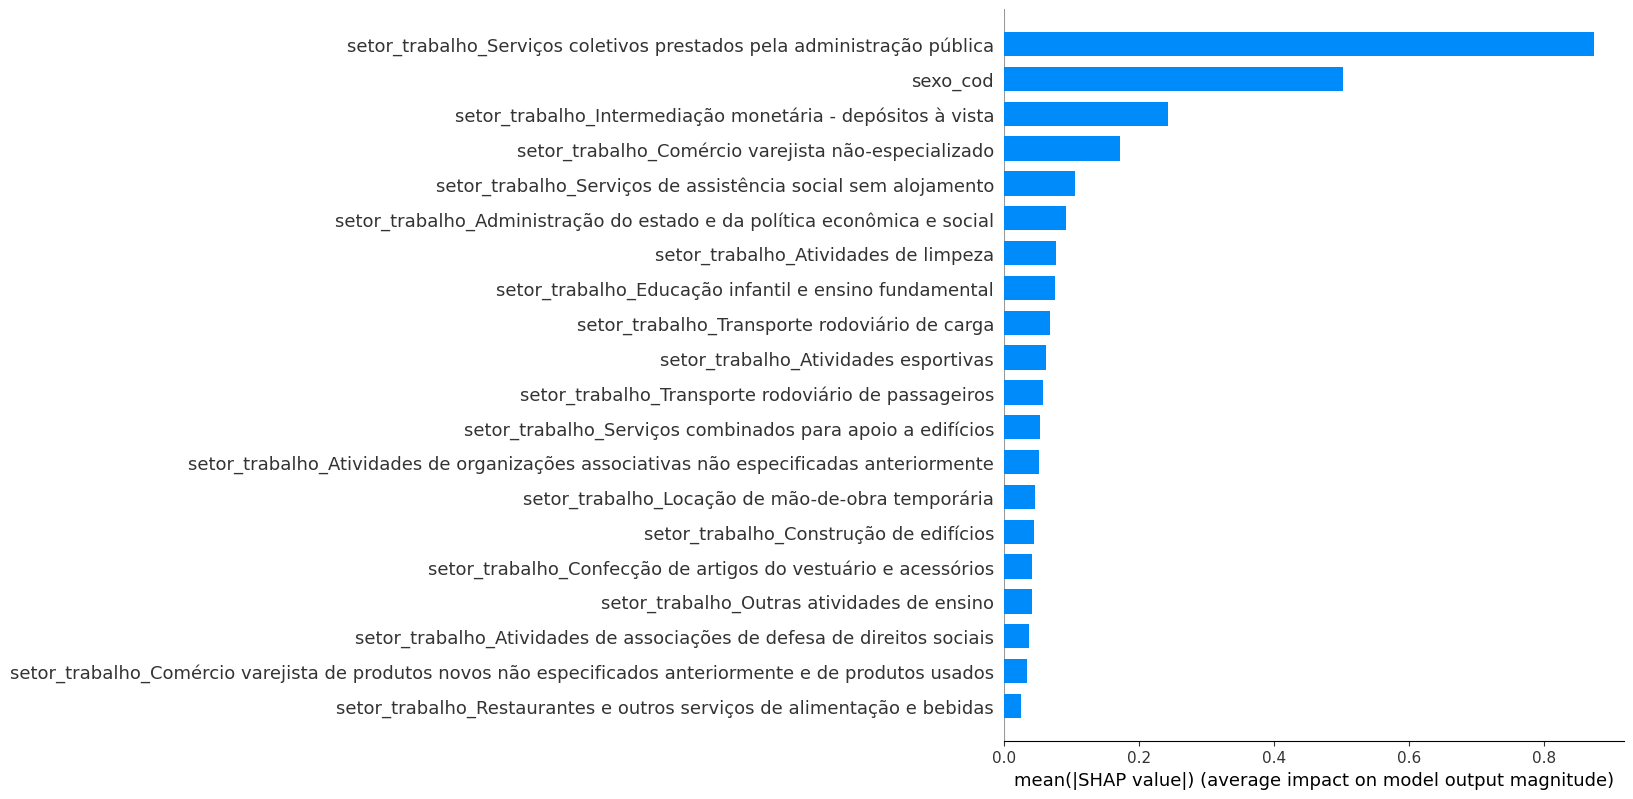

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/shap/plots/_beeswarm.py:962: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


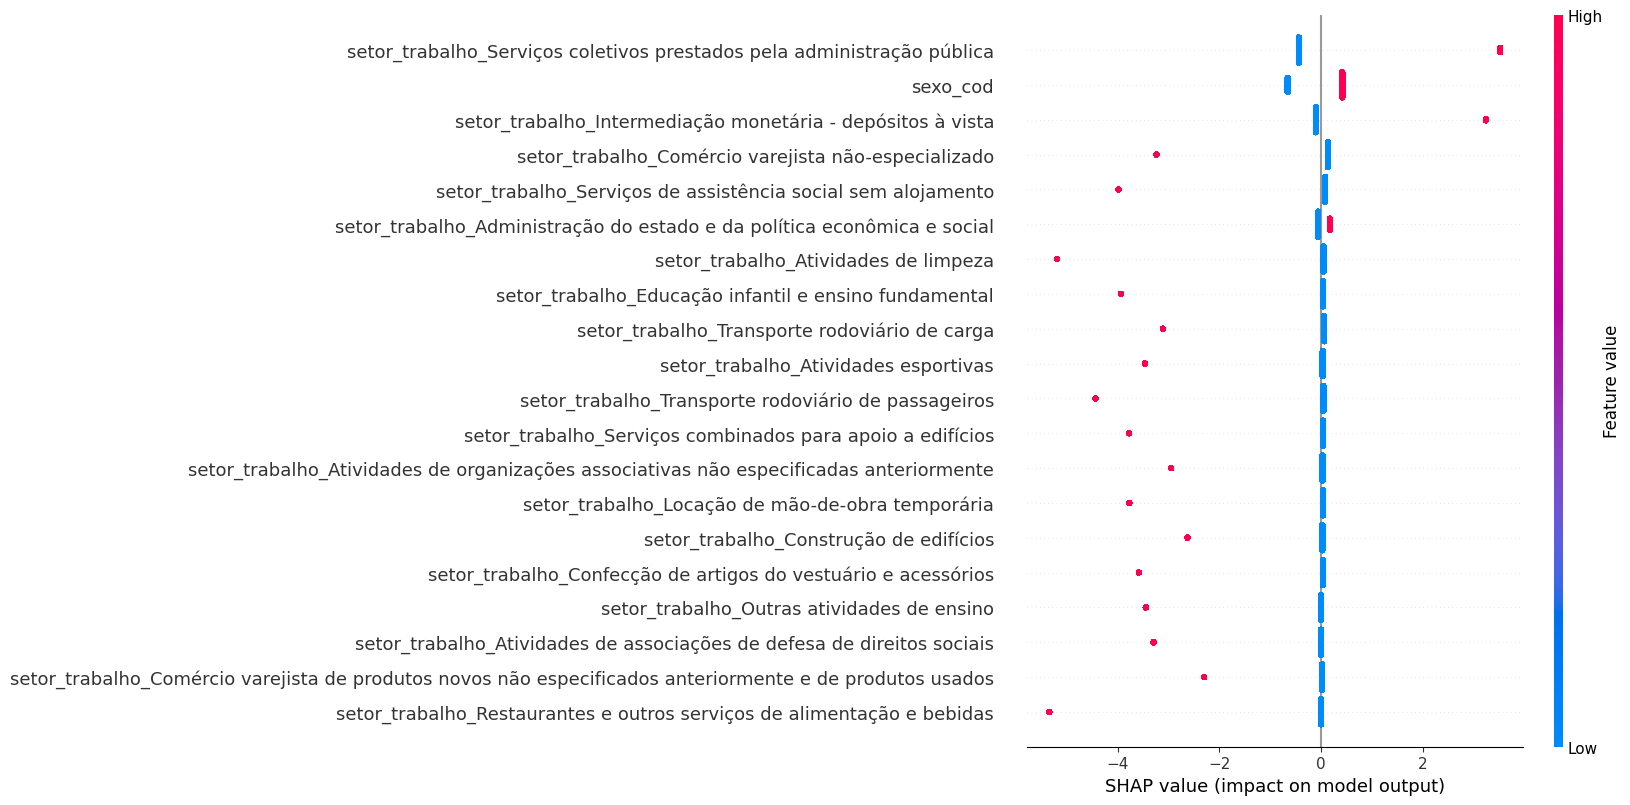

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Supondo que df_logistica é seu DataFrame e X e y já estão definidos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criação do modelo de regressão logística
model_sklearn = LogisticRegression(max_iter=1000)
model_sklearn.fit(X_train, y_train)

# Usando SHAP
import shap

explainer = shap.Explainer(model_sklearn, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


In [29]:
df_logistica.columns

Index(['faixa_remuneracao_media_sm', 'sexo_cod', 'random_faixa',
       'setor_trabalho_Administração do estado e da política econômica e social',
       'setor_trabalho_Atividades de Correio',
       'setor_trabalho_Atividades de associações de defesa de direitos sociais',
       'setor_trabalho_Atividades de limpeza',
       'setor_trabalho_Atividades de organizações associativas não especificadas anteriormente',
       'setor_trabalho_Atividades de organizações sindicais',
       'setor_trabalho_Atividades de vigilância, segurança privada e transporte de valores',
       'setor_trabalho_Atividades esportivas',
       'setor_trabalho_Comércio de veículos automotores',
       'setor_trabalho_Comércio varejista de material de construção',
       'setor_trabalho_Comércio varejista de produtos alimentícios, bebidas e fumo',
       'setor_trabalho_Comércio varejista de produtos farmacêuticos, perfumaria e cosméticos e artigos médicos, ópticos e ortopédicos',
       'setor_trabalho_Comérci

In [30]:
df_logistica.groupby('sexo_cod')['setor_trabalho_Administração do estado e da política econômica e social'].value_counts().unstack().fillna(0)


setor_trabalho_Administração do estado e da política econômica e social       0  \
sexo_cod                                                                          
0                                                                        107071   
1                                                                        209794   

setor_trabalho_Administração do estado e da política econômica e social      1  
sexo_cod                                                                        
0                                                                        55091  
1                                                                        85171

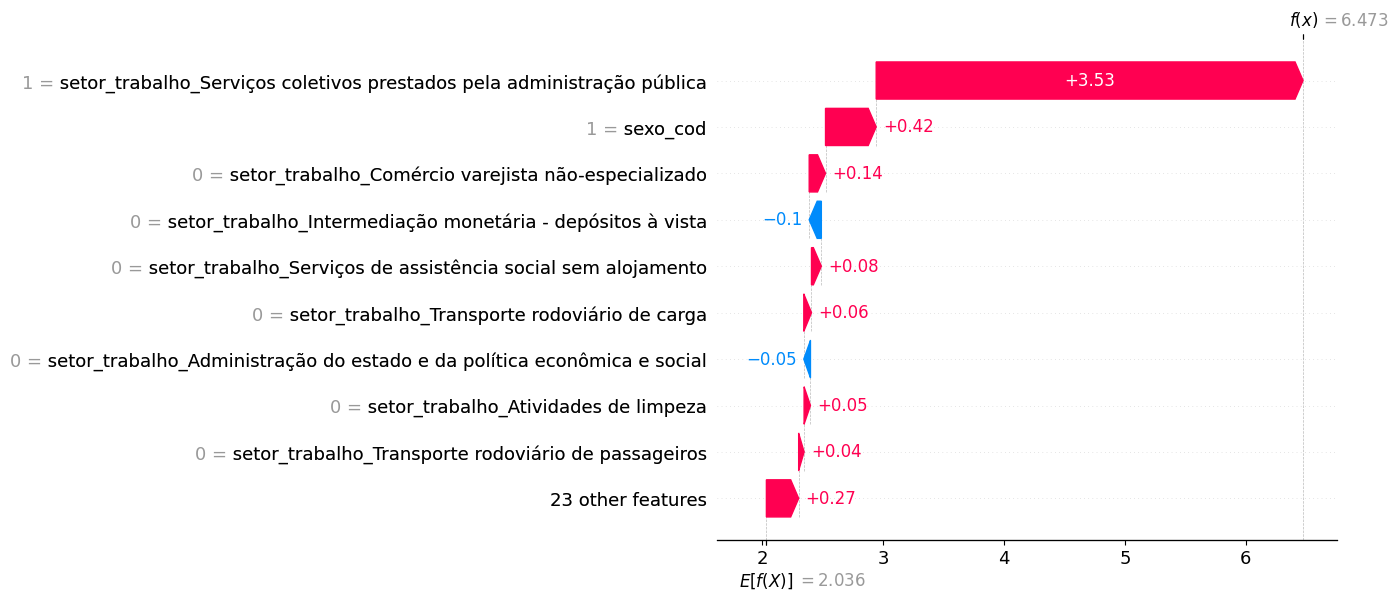

In [17]:
# Selecionando uma observação específica para o gráfico waterfall
# Aqui estou selecionando a primeira observação do conjunto de teste (index 0)
expected_value = explainer.expected_value
shap_value = shap_values[0]

# Plotando o gráfico waterfall para a primeira observação
shap.plots.waterfall(shap_value)

In [ ]:
# Filtrando o DataFrame de acordo com as condições (sexo feminino e setor específico)
# Exemplo: setor específico é 'setor_trabalho_Comercio_varejista_de_material_de_construcao'
sexo_feminino = X_test[X_test['sexo_cod'] == 1]  # Supondo que 1 representa feminino
setor_especifico = sexo_feminino[sexo_feminino['setor_trabalho_Comercio_varejista_de_material_de_construcao'] == 1]

# Verificando se há alguma observação que atende às condições
if not setor_especifico.empty:
    # Obtendo o índice da primeira observação que atende às condições
    index = setor_especifico.index[0]

    # Função para plotar gráfico waterfall para uma observação específica
    def plot_waterfall_for_observation(index):
        shap_value = shap_values[index]
        shap.plots.waterfall(shap_value)

    # Plotando o gráfico waterfall para a observação que atende às condições
    plot_waterfall_for_observation(index)
else:
    print("Nenhuma observação encontrada que atenda às condições especificadas.")

In [21]:
shap_value

.values =
array([ 0.        , -0.65518826,  0.17385095, -0.        , -0.        ,
        0.05249268,  0.02981552, -0.        , -0.        ,  0.03500877,
       -0.        , -0.        , -0.        , -0.        ,  0.02323091,
        0.13500061,  0.03622333,  0.026559  ,  0.03977511, -0.        ,
       -0.10034332,  0.0381071 , -0.        , -0.        , -0.        ,
       -0.        , -0.43616291,  0.03816706,  0.08136818, -0.        ,
        0.06352596,  0.04485704])

.base_values =
2.035903987578881

.data =
array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

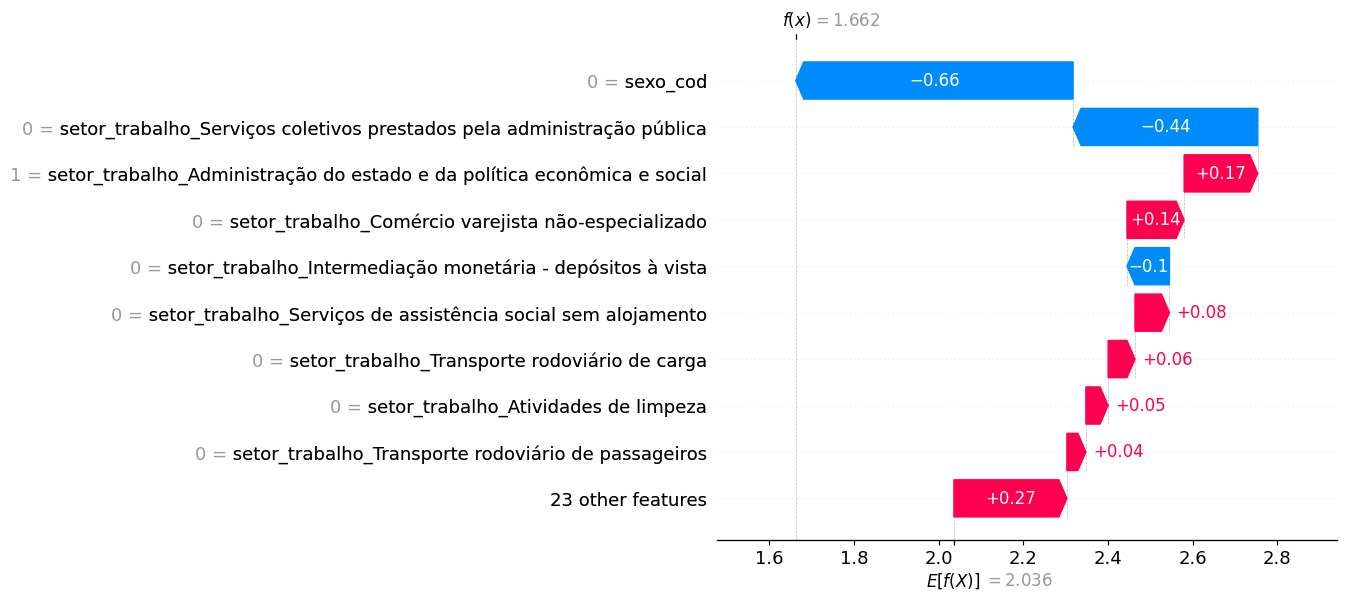

In [20]:
# Selecionando uma observação específica para o gráfico waterfall
# Aqui estou selecionando a primeira observação do conjunto de teste (index 0)
expected_value = explainer.expected_value
shap_value = shap_values[3]

# Plotando o gráfico waterfall para a primeira observação
shap.plots.waterfall(shap_value)

In [24]:
df_logistica.columns


Index(['faixa_remuneracao_media_sm', 'sexo_cod',
       'setor_trabalho_Abate e fabricação de produtos de carne',
       'setor_trabalho_Acabamentos em fios, tecidos e artefatos têxteis',
       'setor_trabalho_Administração do estado e da política econômica e social',
       'setor_trabalho_Agências de viagens e operadores turísticos',
       'setor_trabalho_Aluguel de máquinas e equipamentos sem operador',
       'setor_trabalho_Aluguel de objetos pessoais e domésticos',
       'setor_trabalho_Aparelhamento de pedras e fabricação de outros produtos de minerais não-metálicos',
       'setor_trabalho_Aqüicultura',
       ...
       'setor_trabalho_Transporte dutoviário',
       'setor_trabalho_Transporte ferroviário e metroferroviário',
       'setor_trabalho_Transporte marítimo de cabotagem e longo curso',
       'setor_trabalho_Transporte por navegação interior',
       'setor_trabalho_Transporte rodoviário de carga',
       'setor_trabalho_Transporte rodoviário de passageiros',
    

Agora vou rodar a logistica deixando como variavel y o sexo cod e colocando todas as outras como dependentes para ver qual explica melhor

LinearExplainer explainer: 5166673it [00:28, 107069.85it/s]                             
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/shap/plots/_beeswarm.py:962: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


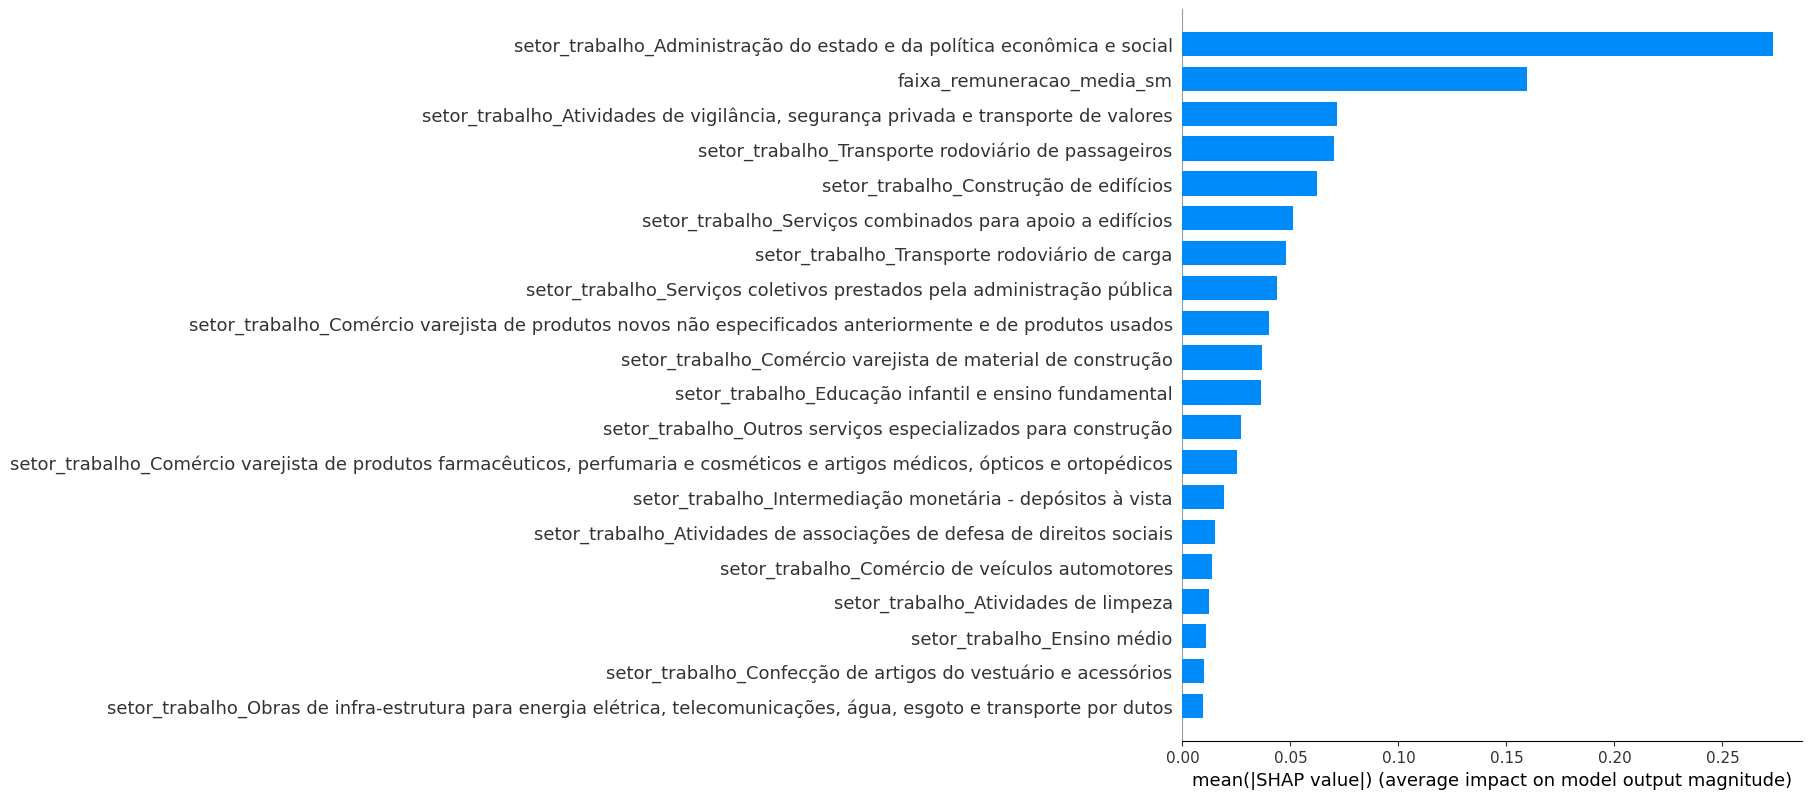

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/shap/plots/_beeswarm.py:962: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


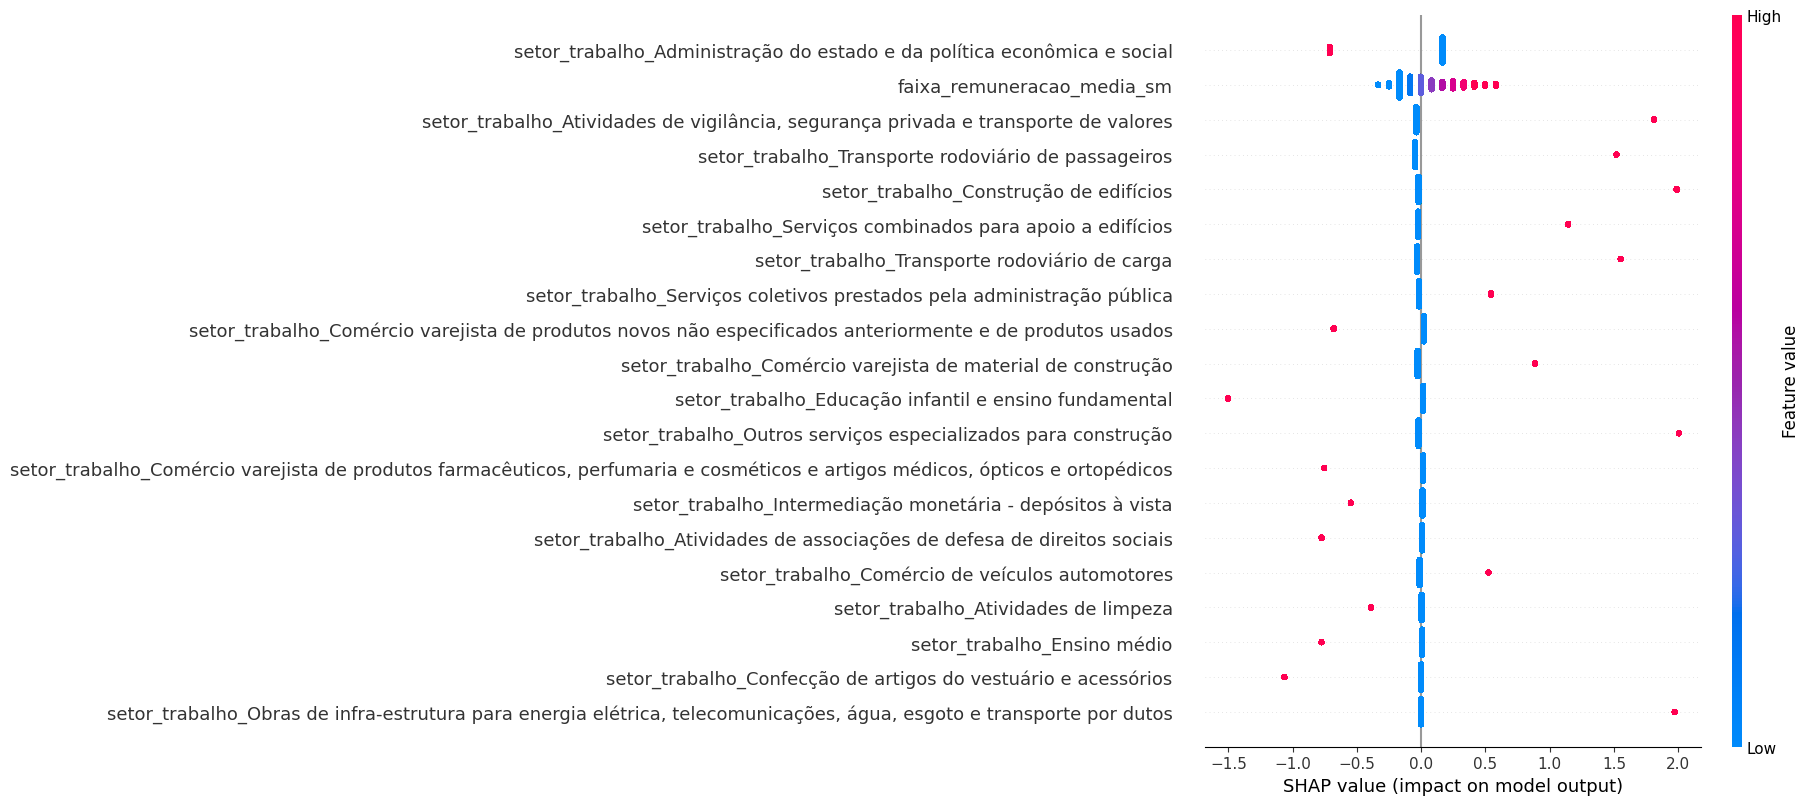

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['faixa_remuneracao_media_sm', "setor_trabalho_Administração do estado e da política econômica e social",
"setor_trabalho_Atividades de Correio",
"setor_trabalho_Atividades de associações de defesa de direitos sociais",
"setor_trabalho_Atividades de limpeza",
"setor_trabalho_Atividades de organizações associativas não especificadas anteriormente",
"setor_trabalho_Atividades de organizações sindicais",
"setor_trabalho_Atividades de vigilância, segurança privada e transporte de valores",
"setor_trabalho_Atividades esportivas",
"setor_trabalho_Comércio de veículos automotores",
"setor_trabalho_Comércio varejista de material de construção",
"setor_trabalho_Comércio varejista de produtos alimentícios, bebidas e fumo",
"setor_trabalho_Comércio varejista de produtos farmacêuticos, perfumaria e cosméticos e artigos médicos, ópticos e ortopédicos",
"setor_trabalho_Comércio varejista de produtos novos não especificados anteriormente e de produtos usados",
"setor_trabalho_Comércio varejista não-especializado",
"setor_trabalho_Confecção de artigos do vestuário e acessórios",
"setor_trabalho_Construção de edifícios",
"setor_trabalho_Educação infantil e ensino fundamental",
"setor_trabalho_Ensino médio",
"setor_trabalho_Intermediação monetária - depósitos à vista",
"setor_trabalho_Locação de mão-de-obra temporária",
"setor_trabalho_Obras de infra-estrutura para energia elétrica, telecomunicações, água, esgoto e transporte por dutos",
"setor_trabalho_Outras atividades de ensino",
"setor_trabalho_Outros serviços especializados para construção",
"setor_trabalho_Restaurantes e outros serviços de alimentação e bebidas",
"setor_trabalho_Serviços coletivos prestados pela administração pública",
"setor_trabalho_Serviços combinados para apoio a edifícios",
"setor_trabalho_Serviços de assistência social sem alojamento",
"setor_trabalho_Serviços de catering, bufê e outros serviços de comida preparada",
"setor_trabalho_Transporte rodoviário de carga",
"setor_trabalho_Transporte rodoviário de passageiros"]]  

y= df['sexo_cod']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model_sklearn = LogisticRegression(max_iter=1000)
model_sklearn.fit(X_train, y_train)

# Usando SHAP
import shap

explainer = shap.Explainer(model_sklearn, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)
